In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import math

In [ ]:
def bilinear_interpolation(image, y, x):
    height = image.shape[0]
    width = image.shape[1]

    x1 = max(min(math.floor(x), width - 1), 0)     #max(min(math.floor(0.25), 511), 0) = 0
    y1 = max(min(math.floor(y), height - 1), 0)    #max(min(math.floor(0.25), 511), 0) = 0
    x2 = max(min(math.ceil(x), width - 1), 0)      #max(min(math.ceil(0.25), 511), 0) =1
    y2 = max(min(math.ceil(y), height - 1), 0)     #max(min(math.ceil(0.25), 511), 0) =1

    a = (image[y1, x1])  #img(0,0)
    b = (image[y2, x1])  #img(1,0)
    c = (image[y1, x2])  #img(0,1)
    d = (image[y2, x2])  #img(1,1)

    dx = x - x1   
    dy = y - y1   

    new_pixel = a * (1 - dx) * (1 - dy)
    new_pixel += b * dy * (1 - dx)
    new_pixel += c * dx * (1 - dy)
    new_pixel += d * dx * dy
    return round(new_pixel)

In [ ]:
def resize(image, new_height, new_width):
    new_image = np.zeros((new_height, new_width))
    # new_image = [[0 for _ in range(new_width)] for _ in range(new_height)]

    orig_height = image.shape[0]     #512
    orig_width = image.shape[1]      #512

    # center column and center row 
    x_orig_center = (orig_width-1) / 2     #255.5
    y_orig_center = (orig_height-1) / 2    #255.5

    # center of resized image
    x_scaled_center = (new_width-1) / 2     #511.5
    y_scaled_center = (new_height-1) / 2    #511.5

    # scale in both axes
    scale_x = orig_width / new_width;     #0.5
    scale_y = orig_height / new_height;   #0.5

    for y in range(new_height):
        for x in range(new_width):
            x_ = (x - x_scaled_center) * scale_x + x_orig_center    #(1-511.5)*0.5+255.5 = 0.25
            y_ = (y - y_scaled_center) * scale_y + y_orig_center    #(1-511.5)*0.5+255.5 = 0.25

            new_image[y, x] = bilinear_interpolation(image, y_, x_)

    return new_image

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lenna.png')
img = 0.289*image[:,:,0] + 0.587*image[:,:,1] + 0.114*image[:,:,2]

print("Enter a number from 2-5")
scale = float(input())
new_width = int(img.shape[1]*scale)
new_height = int(img.shape[0]*scale)

print(new_height, new_width)
resized_img = resize(img, new_height, new_width)

Enter a number from 2-5
1.5
768 768


(<matplotlib.axes._subplots.AxesSubplot at 0x7f0c8287d390>,
 Text(0.5, 1.0, 'Scaled Image'))

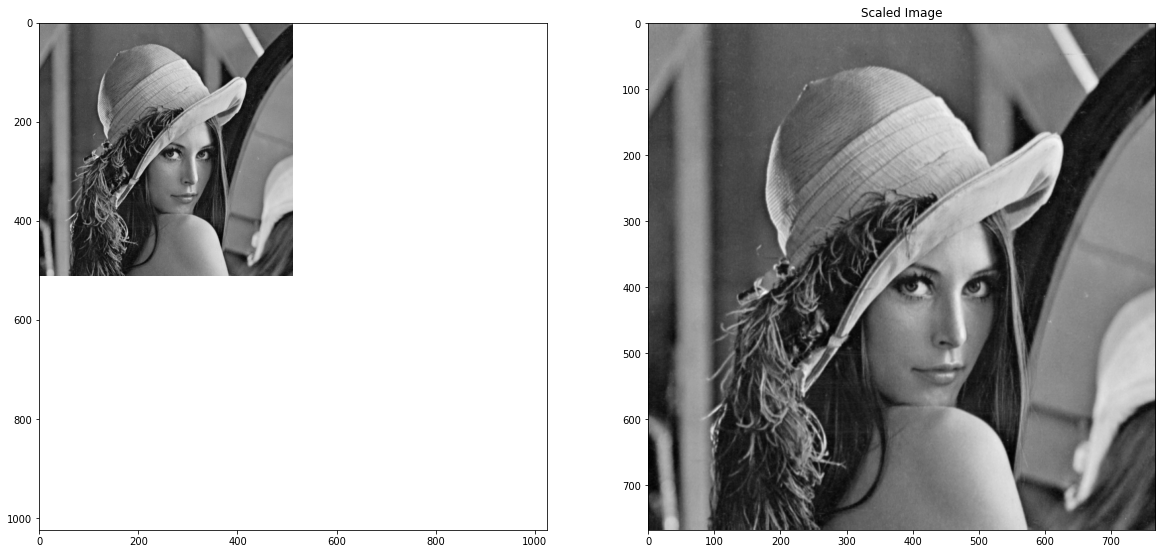

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(121),plt.imshow(img, cmap = 'gray'), plt.axis(xmin =  0, xmax = 1024, ymin = 1024, ymax = 0)
plt.subplot(122), plt.imshow(resized_img, cmap = 'gray'), plt.title("Scaled Image")

In [ ]:
print(resized_img.min(), resized_img.max())

23.0 233.0


In [ ]:
print(img.min(), img.max())

21.500999999999998 237.165


In [ ]:
a = 1  #img(0,0)
b = 3  #img(1,0)
c = 3  #img(0,1)
d = 5  #img(1,1)

dx = 1
dy = 0.5

new_pixel = a * (1 - dx) * (1 - dy)
new_pixel += b * dy * (1 - dx)
new_pixel += c * dx * (1 - dy)
new_pixel += d * dx * dy
print(round(new_pixel))

4
